<a href="https://colab.research.google.com/github/plaban1981/PredictiveModeMarkupLanguage/blob/master/PMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Putting Scikit-Learn models into production with PMML

Using Sklearn2pmml from pipelining to modeling to production


https://medium.com/@xiaowei_6531/putting-sci-kit-learn-models-into-production-with-pmml-1d17b5fc8123

PMML stands for “Predictive Model Markup Language”. It is an XML based file format that serves as a intermediary between different programming languages. A model could be created in Python/R, saved as an XML file, and then be handed off to a software engineer for production.

There exists a sklearn2pmml package that can automatically package your sklearn data pipelines that feed into your model along with the model itself into the same PMML file!

Sklearn data prep and grid search pipeline that ends in the creation of a PMML file. 

**Note that the entire sklearn pipeline is saved in the PMML file not just the model itself**

In [5]:
!pip install sklearn2pmml

     |████████████████████████████████| 5.6MB 2.8MB/s 
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.55.4-cp36-none-any.whl size=5639646 sha256=ef9cb819b4d4610b90e1f312fefa89b5cab42ee0d500607e1d64c0fbc2c124b2
  Stored in directory: /root/.cache/pip/wheels/09/59/21/0d21d626166a52114f645f7eb675b51d947a32811f6e5198bf
Successfully built sklearn2pmml


https://github.com/xiaowei1234/Sklearn-PMML/blob/master/sklearn_to_pmml.ipynb

https://www.slideshare.net/VilluRuusmann/converting-scikitlearn-to-pmml?from_action=save

In [0]:
from sklearn2pmml import PMMLPipeline
from sklearn2pmml import Pipeline
from sklearn2pmml import sklearn2pmml

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import pandas as pd

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data.target
print(data.keys())
#iris_df = pandas.read_csv("Iris.csv") 

print(X.shape)
print(Y.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
(150,)


In [90]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
cols = data.feature_names
labels = data.target_names
print(cols)
print(labels)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [0]:
pl = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
    , ('standardize', StandardScaler())
    , ('clf', SGDClassifier())
])

In [30]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [0]:
y_pred = pl.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9666666666666667

In [35]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

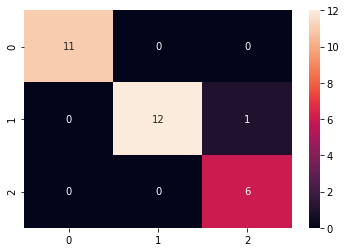

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2g')

## (J)PMML solution

#### Predictive Model Markup Language

A smart pipeline that collects supporting information about
"passed through" features and label(s):

● Name

● Data type (eg. string, float, integer, boolean)

● Operational type (eg. continuous, categorical, ordinal)

● Domain of valid values

● Missing and invalid value treatments

In [40]:
from sklearn2pmml import PMMLPipeline
from sklearn2pmml import sklearn2pmml

pipeline = PMMLPipeline([
    ('impute', SimpleImputer(strategy='median'))
    , ('standardize', StandardScaler())
    , ('clf', SGDClassifier())
])
pipeline.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PMMLPipeline(steps=[('impute', SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)),
       ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)),
       ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False))])

In [0]:
sklearn2pmml(pipeline, "pipeline.pmml")

In [56]:
X.shape

(150, 4)

## Making a PMML pipeline

In [62]:
from sklearn2pmml import make_pmml_pipeline,sklearn2pmml
pipeline = PMMLPipeline([
    ('impute', SimpleImputer(strategy='median'))
    , ('standardize', StandardScaler())
    , ('clf', SGDClassifier())
])
pipeline.fit(X,Y)

pipeline = make_pmml_pipeline(
pipeline,
)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [0]:
sklearn2pmml(pipeline, "pipeline1.pmml")

In [0]:
alpha = [0.0001, 0.001, 0.1]
#
l1_ratio = [0.1, 0.2, 0.4]
#
C_options = [0.2, 0.4, 0.6, 0.8]

In [0]:
param_grid =  [
    {
    'clf': [SGDClassifier(penalty='elasticnet', max_iter=500, loss='log')]
    , 'clf__l1_ratio': l1_ratio
    , 'clf__alpha': alpha
    }, 
    {'clf': [LogisticRegression(penalty='l2', max_iter=500)]
    , 'clf__C': C_options
    }
]

In [0]:
grid = GridSearchCV(pl, param_grid=param_grid,cv=6, verbose=5, return_train_score=True, n_jobs=2)


In [185]:
grid.fit(X_train,y_train)

Fitting 6 folds for each of 13 candidates, totalling 78 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done  78 out of  78 | elapsed:    1.5s finished


GridSearchCV(cv=6, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('impute',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SGDClassifier(alpha=0.0001,
                                                      average=Fal

In [76]:
from sklearn2pmml import make_pmml_pipeline
pmml_pipe = make_pmml_pipeline(grid,)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [70]:
grid.best_params_

{'clf': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.4, learning_rate='optimal', loss='log', max_iter=500,
               n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 'clf__alpha': 0.0001,
 'clf__l1_ratio': 0.4}

In [186]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.4, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [187]:
cv_df = pd.DataFrame(grid.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__alpha,param_clf__l1_ratio,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.008349,0.001110,0.000922,0.000138,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,0.1,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.90,1.00,0.95,0.95,1.00,0.85,0.941667,0.053359,4,0.95,0.93,0.94,0.94,0.93,0.98,0.945000,0.017078
1,0.007617,0.001784,0.001112,0.000787,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,0.2,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.95,1.00,0.95,0.90,0.95,0.80,0.925000,0.062915,5,0.94,0.96,0.98,0.97,0.95,0.98,0.963333,0.014907
2,0.007899,0.003745,0.003865,0.006240,"SGDClassifier(alpha=0.0001, average=False, cla...",0.0001,0.4,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.90,0.95,0.90,0.90,0.70,0.80,0.858333,0.083749,10,0.96,0.92,0.90,0.94,0.75,0.96,0.905000,0.072514
3,0.011238,0.005776,0.003785,0.006731,"SGDClassifier(alpha=0.0001, average=False, cla...",0.001,0.1,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.90,1.00,0.95,0.90,0.95,0.85,0.925000,0.047871,7,0.96,0.93,0.98,0.97,0.95,0.98,0.961667,0.017717
4,0.005854,0.000271,0.000764,0.000041,"SGDClassifier(alpha=0.0001, average=False, cla...",0.001,0.2,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.90,1.00,0.95,0.90,0.95,0.80,0.916667,0.062361,9,0.97,0.95,0.99,0.96,0.95,0.98,0.966667,0.014907
5,0.012435,0.007452,0.000784,0.000090,"SGDClassifier(alpha=0.0001, average=False, cla...",0.001,0.4,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.90,1.00,0.95,0.90,0.95,0.85,0.925000,0.047871,7,0.97,0.96,0.97,0.96,0.96,0.98,0.966667,0.007454
6,0.008710,0.003699,0.001021,0.000426,"SGDClassifier(alpha=0.0001, average=False, cla...",0.1,0.1,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.75,0.90,0.90,0.80,0.80,0.95,0.850000,0.070711,11,0.86,0.85,0.85,0.86,0.87,0.84,0.855000,0.009574
7,0.009014,0.003289,0.000826,0.000089,"SGDClassifier(alpha=0.0001, average=False, cla...",0.1,0.2,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.75,0.90,0.90,0.80,0.80,0.95,0.850000,0.070711,11,0.86,0.85,0.85,0.86,0.87,0.84,0.855000,0.009574
8,0.007439,0.003654,0.000788,0.000083,"SGDClassifier(alpha=0.0001, average=False, cla...",0.1,0.4,NaN,"{'clf': SGDClassifier(alpha=0.0001, average=Fa...",0.75,0.90,0.90,0.80,0.80,0.95,0.850000,0.070711,11,0.85,0.84,0.83,0.86,0.87,0.84,0.848333,0.013437
9,0.011064,0.002719,0.000819,0.000077,"LogisticRegression(C=0.4, class_weight=None, d...",NaN,NaN,0.2,"{'clf': LogisticRegression(C=0.4, class_weight...",0.90,1.00,0.95,0.90,0.90,0.90,0.925000,0.038188,5,0.93,0.91,0.95,0.93,0.93,0.94,0.931667,0.012134


In [77]:
from sklearn2pmml.pipeline import PMMLPipeline
grid_pipeline = PMMLPipeline([
    ('impute', SimpleImputer(strategy='median'))
    , ('standardize', StandardScaler())
    , ('clf', grid.best_estimator_)
])

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [79]:
grid_pipeline.fit(X,Y)

PMMLPipeline(steps=[('impute', SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)),
       ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)),
       ('clf', Pipeline(memory=None,
         steps=[('impute',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.4,
                               learning_rate='optimal', loss='log',
                               max_iter=500, n_iter_no_change=5, n_jobs=None,
  

#### Convert the PMMLPipeline object to a PMML file in local filesystem by invoking utility method sklearn2pmml.sklearn2pmml(pipeline, pmml_destination_path).

In [0]:
sklearn2pmml(grid_pipeline, 'pmml_model.pmml', with_repr=True)

## Predictions

In [0]:
y_pred = grid_pipeline.predict(X_test)

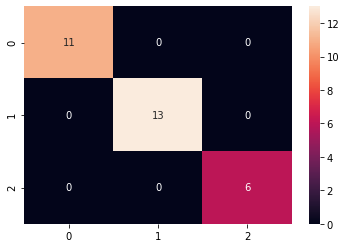

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2g')

## Pipeline setup 

- 1. Feature and label definition - Specific to (J)PMML
- 2. Feature engineering
- 3. Feature selection - Scikit-Learn persists all features, (J)PMML persists "surviving" features
-4. Estimator fitting
-5. Decision engineering - Specific to (J)PMML

Workflow:

1. Column- and column set-oriented feature definition,
engineering and selection

2. Table-oriented feature engineering and selection

3. Estimator fitting

Full support for pipeline nesting, branching.

In [0]:
from sklearn2pmml import PMMLPipeline
from sklearn2pmml.decoration import CategoricalDomain, ContinuousDomain
from sklearn_pandas import DataFrameMapper

In [0]:
df1 = pd.DataFrame(X,columns=data.feature_names)
df1['Labels'] = Y

In [87]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [172]:
x = df1.drop('Labels',axis=1)
y = df1['Labels']

x.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [179]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

pipeline_1 = PMMLPipeline([
("stage1", DataFrameMapper([
(x.columns.to_list(),  [ContinuousDomain(), SimpleImputer(strategy='median')])])),
("stage2", SelectKBest(chi2, k=2)),
("stage3", RandomForestClassifier())
])

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [180]:
pipeline_1.fit(x,y)

PMMLPipeline(steps=[('stage1', DataFrameMapper(default=False, df_out=False,
                features=[(['sepal length (cm)', 'sepal width (cm)',
                            'petal length (cm)', 'petal width (cm)'],
                           [ContinuousDomain(dtype=None, high_value=None,
                                             invalid_value_replacement=None,
                                             invalid_value_treatment='return_invalid',
                                             low_value=None,
                                             missing_value_replacement=None,
                                             missing_value_treatment='as_is',
                                             missing_values=None,
                                             outlier_treatment='as_is',
                                             with_data=True,
                                             with_statistics=True),
                            SimpleImputer(add_indicator=False, c

In [0]:
y_pred = pipeline.predict(x)

Without missing values:

(features=[(['sepal length (cm)', 'sepal width (cm)',
                            'petal length (cm)', 'petal width (cm)'], [ContinuousDomain(invalid_value_treatment = "return_invalid",
missing_value_treatment = "as_is", with_data = True,
with_statistics = True)])



With missing values (encoded as None/NaN):

(Features=[(['sepal length (cm)', 'sepal width (cm)',
                            'petal length (cm)', 'petal width (cm)'],, [ContinuousDomain(), Imputer()])
With missing values (encoded using dummy values):

(Features=[(['sepal length (cm)', 'sepal width (cm)',
                            'petal length (cm)', 'petal width (cm)'],, [ContinuousDomain(missing_values = -999),
Imputer(missing_values = -999)])

In [0]:
sklearn2pmml(pipeline_1, "RanomForestClassifier.pmml", with_repr = True)

## Feature engineering

In [0]:
#sample code Continuous features 
from sklearn.preprocessing import Binarizer, FunctionTransformer
from sklearn2pmml.preprocessing import ExpressionTransformer
features = FeatureUnion([
                        ("identity", DataFrameMapper([(["Income", "Hours"], ContinuousDomain())])),
                         ("transformation", DataFrameMapper([(["Income"], FunctionTransformer(numpy.log10)),
                                    (["Hours"], Binarizer(threshold = 40)),
                                    (["Income", "Hours"], ExpressionTransformer("X[:,0]/(X[:,1]*52)"))
                                     ]))
])

In [0]:
# sample code Categorical features
from sklearn preprocessing import LabelBinarizer, PolynomialFeatures
features = Pipeline([
("identity", DataFrameMapper([
("Education", [CategoricalDomain(), LabelBinarizer()]),
("Occupation", [CategoricalDomain(), LabelBinarizer()])
])),
("interaction", PolynomialFeatures())
])

## Algorithm tuning


In [188]:
!pip install tpot

     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 163kB 8.2MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=11777c8b58ab76da15a9da101710f579a010487d384ab4949fa08e50972bb652
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [200]:
from sklearn2pmml import make_pmml_pipeline, sklearn2pmml
from tpot import TPOTClassifier
# See https://github.com/rhiever/tpot
tpot = TPOTClassifier()
tpot.fit(x,y)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=0, warm_start=False)

In [201]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=MultinomialNB(alpha=100.0,
                                                           class_prior=None,
                                                           fit_prior=False))),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='distance'))],
         verbose=False)


In [199]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [215]:
pmml_pipeline = make_pmml_pipeline(tpot.fitted_pipeline_, active_fields = data.feature_names, target_fields = ["species"])

sklearn2pmml(pmml_pipeline, "TPOTIris.pmml", with_repr = True)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Standard output is empty
Standard error:
Apr 07, 2020 3:46:54 PM org.jpmml.sklearn.Main run
INFO: Parsing PKL..
Apr 07, 2020 3:46:54 PM org.jpmml.sklearn.Main run
INFO: Parsed PKL in 55 ms.
Apr 07, 2020 3:46:54 PM org.jpmml.sklearn.Main run
INFO: Converting..
Apr 07, 2020 3:46:54 PM org.jpmml.sklearn.Main run
SEVERE: Failed to convert
java.lang.IllegalArgumentException: Attribute 'tpot.builtins.stacking_estimator.StackingEstimator.estimator' has an unsupported value (Python class sklearn.naive_bayes.MultinomialNB)
	at org.jpmml.sklearn.CastFunction.apply(CastFunction.java:45)
	at org.jpmml.sklearn.PyClassDict.get(PyClassDict.java:82)
	at tpot.builtins.StackingEstimator.getEstimator(StackingEstimator.java:143)
	at tpot.builtins.StackingEstimator.getNumberOfFeatures(StackingEstimator.java:56)
	at sklearn.TransformerUtil.getNumberOfFeatures(TransformerUtil.java:41)
	at sklearn.Composite.encodeFeatures(Composite.java:123)
	at sklearn2pmml.pipeline.PMMLPipeline.encodePMML(PMMLPipeline.java:

RuntimeError: ignored

In [217]:
from sklearn.datasets import load_iris
from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
from tpot import TPOTClassifier

iris = load_iris()

classifier = TPOTClassifier(generations = 3, population_size = 11, random_state = 13, verbosity = 2)
classifier.fit(iris.data, iris.target)

pmml_pipeline = make_pmml_pipeline(classifier.fitted_pipeline_)
pmml_pipeline.fit(x,y)
sklearn2pmml(pmml_pipeline, "TPOTIris.pmml", with_repr = True)

Generation 1 - Current best internal CV score: 0.9733333333333334
Generation 2 - Current best internal CV score: 0.9800000000000001
Generation 3 - Current best internal CV score: 0.9800000000000001

Best pipeline: LogisticRegression(CombineDFs(input_matrix, input_matrix), C=15.0, dual=False, penalty=l2)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Standard output is empty
Standard error:
Apr 07, 2020 3:49:41 PM org.jpmml.sklearn.Main run
INFO: Parsing PKL..
Apr 07, 2020 3:49:41 PM org.jpmml.sklearn.Main run
INFO: Parsed PKL in 33 ms.
Apr 07, 2020 3:49:41 PM org.jpmml.sklearn.Main run
INFO: Converting..
Apr 07, 2020 3:49:41 PM org.jpmml.sklearn.Main run
SEVERE: Failed to convert
java.lang.IllegalArgumentException: Attribute 'sklearn.preprocessing._function_transformer.FunctionTransformer.func' has an unsupported value (Java class net.razorvine.pickle.objects.ClassDictConstructor)
	at org.jpmml.sklearn.CastFunction.apply(CastFunction.java:45)
	at org.jpmml.sklearn.PyClassDict.get(PyClassDict.java:82)
	at org.jpmml.sklearn.PyClassDict.getOptional(PyClassDict.java:92)
	at sklearn.preprocessing.FunctionTransformer.getFunc(FunctionTransformer.java:63)
	at sklearn.preprocessing.FunctionTransformer.encodeFeatures(FunctionTransformer.java:43)
	at sklearn.Transformer.updateAndEncodeFeatures(Transformer.java:118)
	at sklearn.pipeline.Featu

RuntimeError: ignored

https://openscoring.io/blog/2019/06/10/converting_sklearn_tpot_pipeline_pmml/